## Install Sentinel-Hub

In [ ]:
pip install sentinelhub --upgrade

     |████████████████████████████████| 194kB 4.2MB/s 
     |████████████████████████████████| 133kB 27.3MB/s 
     |████████████████████████████████| 7.2MB 42.7MB/s 
     |████████████████████████████████| 6.5MB 50.8MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.1.0-cp36-none-any.whl size=196404 sha256=e124eab7b278816f98bcfa04e818b8fb3e62f4c61b37196efc7ade2d4327170d
  Stored in directory: /root/.cache/pip/wheels/90/6c/df/be1525ead52f5c2ce49f0880e73587723bf25caac7295f9db2
  Created wheel for utm: filename=utm-0.7.0-cp36-none-any.whl size=6094 sha256=80f5def6f102cc7f488705475c3ca8464b71d7dc1b4eed8fcce3c6242cd09c9e
  Stored in directory: /root/.cache/pip/wheels/d3/a0/c4/93c7535fe705e70d2376505fd2683f91524a50a944a15212d9
Successfully built sentinelhub utm
ERROR: botocore 1.19.55 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Put the path to the folder where we want to save the files from Sentinelhub

In [ ]:
rootPath="/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/"


## Sentinel-HUb configuration.

In [ ]:
from sentinelhub import SHConfig


INSTANCE_ID = '82f77578-eb9a-4909-9a28-30f5279ba6a3'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

#### Imports 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Import the Libraries

In [ ]:
# Please, install all the neccesary libs.
import datetime
import numpy as np

import matplotlib.pyplot as plt
import os 
import json 

In [ ]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, DataCollection

In [ ]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

### Definir el numero del campo de Talca:

#### Comentar uno de los campos y ejecutar el codigo. Hacer lo mismo con el otro campo.

In [ ]:
#num_campo=1
#talca_campo='campo1' 

num_campo=2
talca_campo='campo2'  

In [ ]:
if num_campo==1:
  talca_coords_wgs84 = [-71.817933, -35.452880, -71.807166, -35.446550] #TALCA coordinates 1st PART (Parte izquierda del terreno)
else:
  talca_coords_wgs84 = [-71.800228, -35.457577, -71.786453, -35.449821] #TALCA coordinates 2nd PART (Parte derecha del terreno)

#FORMAT(LONGITUDE1, LATITUDE1, LONGITUDE2, LATITUDE2) From Google Earth they are lower left and upper rigth corners 

In [ ]:
talca_bbox = BBox(bbox=talca_coords_wgs84, crs=CRS.WGS84)

Since data has been already downloaded the next request will read the data from disk instead of downloading it. That will be much faster.

In [ ]:
wms_bands_request_from_disk = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L2A,
    data_folder=rootPath,
    layer='TRUE-COLOR-S2-L2A',
    bbox=talca_bbox,
    time=('2017-01-01','2020-12-31'),
    width=600,
    image_format=MimeType.TIFF,
    time_difference=datetime.timedelta(hours=2),
    config=config
)

In [ ]:
#A list to save the image names and another one to the folders names
image_names=[]
folder_paths=[]
for folder, _, filenames in os.walk(wms_bands_request_from_disk.data_folder):
    for filename in filenames:
        if filename[-1] != 'n':
          if filename[:6]==talca_campo:
            image_names.append(filename)
            folder_paths.append(folder)
            print(os.path.join(folder, filename))

image_names.sort()
folder_paths.sort()
print(image_names)
print("-----------------")
print(folder_paths)
print("-----------------")
print(len(image_names))
print("-----------------")
print(len(folder_paths))

/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-02-18/campo2_2017-02-18.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-29/campo2_2017-01-29.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-04-29/campo2_2017-04-29.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-02-28/campo2_2017-02-28.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-04-09/campo2_2017-04-09.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-19/campo2_2017-01-19.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-06-28/campo2_2017-06-28.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-03-20/campo2_2017-03-20.tiff
/content/gdrive/My Drive

In [ ]:
wms_bands_img_from_disk = wms_bands_request_from_disk.get_data()
print(type(wms_bands_img_from_disk))
print(len(wms_bands_img_from_disk))
print("===================================================================")
print('These %d images were taken on the following dates:' % len(wms_bands_img_from_disk))
for index, date in enumerate(wms_bands_request_from_disk.get_dates()):
    print(' - image %d was taken on %s' % (index, date))


<class 'list'>
230
These 230 images were taken on the following dates:
 - image 0 was taken on 2017-01-19 14:45:47
 - image 1 was taken on 2017-01-29 14:44:58
 - image 2 was taken on 2017-02-18 14:51:50
 - image 3 was taken on 2017-02-28 14:45:05
 - image 4 was taken on 2017-03-20 14:51:59
 - image 5 was taken on 2017-04-09 14:49:33
 - image 6 was taken on 2017-04-29 14:49:45
 - image 7 was taken on 2017-05-19 14:49:48
 - image 8 was taken on 2017-06-08 14:49:11
 - image 9 was taken on 2017-06-28 14:49:05
 - image 10 was taken on 2017-07-13 14:49:43
 - image 11 was taken on 2017-07-18 14:49:10
 - image 12 was taken on 2017-08-02 14:49:42
 - image 13 was taken on 2017-08-27 14:49:09
 - image 14 was taken on 2017-09-11 14:50:07
 - image 15 was taken on 2017-09-16 14:51:18
 - image 16 was taken on 2017-10-01 14:45:37
 - image 17 was taken on 2017-10-06 14:48:51
 - image 18 was taken on 2017-10-21 14:49:45
 - image 19 was taken on 2017-10-26 14:41:12
 - image 20 was taken on 2017-11-10 14:

In [ ]:
#Verificar si el orden del nombre de las carpetas por fecha coincide con el orden de las fotografias leidas del disk. 
dates=[]
for index, date in enumerate(wms_bands_request_from_disk.get_dates()):
    dates.append(str(date))
#print(dates)

dates_final=[]
for i in range(len(dates)):
  dates_final.append(dates[i][:10])
print(dates_final)

dates_folder=[]
for i in range(len(image_names)):
  dates_folder.append(image_names[i][7:17])

print(dates_folder)

if(dates_final==dates_folder):
  print("LAS FECHAS ESTAN BIEN")
else:
  print("LAS FECHAS ESTAN MAL")

['2017-01-19', '2017-01-29', '2017-02-18', '2017-02-28', '2017-03-20', '2017-04-09', '2017-04-29', '2017-05-19', '2017-06-08', '2017-06-28', '2017-07-13', '2017-07-18', '2017-08-02', '2017-08-27', '2017-09-11', '2017-09-16', '2017-10-01', '2017-10-06', '2017-10-21', '2017-10-26', '2017-11-10', '2017-11-15', '2017-11-20', '2017-12-05', '2017-12-10', '2017-12-20', '2017-12-25', '2017-12-30', '2018-01-09', '2018-01-14', '2018-01-19', '2018-01-29', '2018-02-08', '2018-02-13', '2018-02-18', '2018-02-23', '2018-02-28', '2018-03-05', '2018-03-10', '2018-03-15', '2018-03-20', '2018-03-25', '2018-03-30', '2018-04-04', '2018-04-09', '2018-04-14', '2018-04-19', '2018-04-24', '2018-05-09', '2018-05-14', '2018-05-24', '2018-06-03', '2018-06-13', '2018-06-23', '2018-07-08', '2018-07-18', '2018-07-23', '2018-07-28', '2018-08-02', '2018-08-07', '2018-08-12', '2018-08-27', '2018-09-01', '2018-09-06', '2018-09-11', '2018-09-16', '2018-09-21', '2018-09-26', '2018-10-01', '2018-10-06', '2018-10-11', '2018

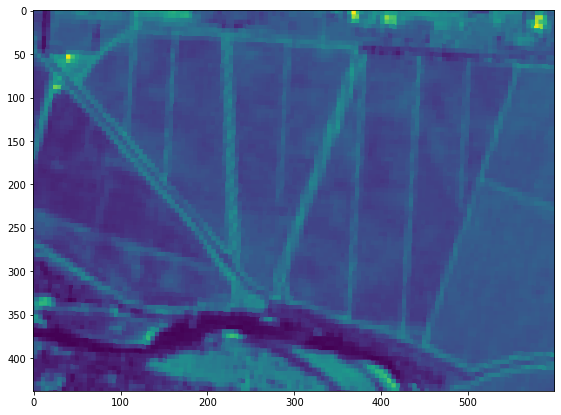

In [ ]:
plot_image(wms_bands_img_from_disk[0][:, :, 1])

### Import OpenCV 

In [ ]:
import cv2
import subprocess
import tifffile as tiff
from google.colab.patches import cv2_imshow

### Get one image per channel and then save it

In [ ]:
#Define a list to save the paths to each channel image of every folder
channels_paths=[]
if talca_campo=='campo1': 
  for i in range(len(image_names)):
    for j in range(3):
      img=wms_bands_img_from_disk[i][:, :, j]
      #pathToEachFolder=''
      name="channel"+str(j+1)+"_"+image_names[i]
      path=folder_paths[i]+"/channels"
      mkdircommand=['mkdir', path]
      subprocess.run(mkdircommand).stdout
      channels_paths.append(path+"/"+name)
      cv2.imwrite(path+"/"+name, img )
      print(path+"/"+name)
else:
  for i in range(len(image_names)):
    for j in range(3):
      img=wms_bands_img_from_disk[i][:, :, j]
      #pathToEachFolder=''
      name="channel"+str(j+1)+"_"+image_names[i]
      path=folder_paths[i]+"/channels"
      mkdircommand=['mkdir', path]
      subprocess.run(mkdircommand).stdout
      channels_paths.append(path+"/"+name)
      cv2.imwrite(path+"/"+name, img )
      print(path+"/"+name)
print(channels_paths)

/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-19/channels/channel1_campo2_2017-01-19.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-19/channels/channel2_campo2_2017-01-19.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-19/channels/channel3_campo2_2017-01-19.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-29/channels/channel1_campo2_2017-01-29.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-29/channels/channel2_campo2_2017-01-29.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-29/channels/channel3_campo2_2017-01-29.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-02-18/channels/channel1_campo2_2017-02-18.tiff
/content/gdrive/My D

### Define the function to crop the image

In [ ]:
def crop_image(img, path,name, num_campo):
  #Tratar de cropear la imagen
  mask = np.zeros(img.shape[0:2], dtype=np.uint8)
  if num_campo == 1:
    points = np.array([[[191,39],[110,412],[221,402],[283,421],[311,315],[394,333],[443,117],[276,38]]]) #Talca first part
  else:
    points = np.array([[[118,22],[93,35],[79,52],[51,85],[233,304],[285,340],[452,380],[569,51]]])  #Talca second part
  #method 1 smooth region
  cv2.drawContours(mask, [points], -1, (255, 255, 255), -1, cv2.LINE_AA)

  res = cv2.bitwise_and(img,img,mask = mask)
  definitive_path=path+"/crop_"+name
  cv2.imwrite(definitive_path, res)


  return definitive_path


In [ ]:
print(len(channels_paths))

690


In [ ]:
print(len(folder_paths))

230


### Crop the images per channel

In [ ]:
#Array to save the paths to the crop images
crop_folders=[]

#make the directories for crop images
for i in range(len(folder_paths)):
  #pathToEachFolder=''
  path=folder_paths[i]+"/crop_channels"
  mkdircommand=['mkdir', path]
  subprocess.run(mkdircommand).stdout
  crop_folders.append(path)
print(crop_folders)

['/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-19/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-01-29/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-02-18/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-02-28/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-03-20/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-04-09/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-04-29/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/campo2_SentinelL2A_2017-05-19/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L2A/c

In [ ]:
print((channels_paths[1][108:]))
print(type(channels_paths[-1:-33]))
#/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/e67a54e5351acd9bb4c014421fb67895/channels/channel2_campo2_2017-12-10.tiff

channel2_campo2_2017-01-19.tiff
<class 'list'>


In [ ]:
#Crop the images

#Array to save the path to each channel crop
channel_crops=[]
aux=-1
for i in range(len(channels_paths)):
  img=cv2.imread(channels_paths[i],cv2.IMREAD_UNCHANGED)
  print(img)
  if i%3!=0:
    crop_folder=crop_folders[aux]
  else:
    aux+=1
    crop_folder=crop_folders[aux]
  #Call to the function crop_image
  name=channels_paths[i][108:]
  channel_crops.append(crop_image(img,crop_folder,str(name),num_campo))

print(channel_crops)

[[32 34 34 ... 81 81 81]
 [32 34 34 ... 81 81 81]
 [32 34 34 ... 71 71 71]
 ...
 [42 42 42 ... 48 48 54]
 [42 42 42 ... 48 48 54]
 [25 25 25 ... 48 48 54]]
[[39 41 41 ... 63 63 63]
 [39 41 41 ... 63 63 63]
 [39 41 41 ... 53 53 53]
 ...
 [40 40 40 ... 44 44 49]
 [40 40 40 ... 44 44 49]
 [28 28 28 ... 44 44 49]]
[[20 23 23 ... 48 48 48]
 [20 23 23 ... 48 48 48]
 [20 23 23 ... 36 36 36]
 ...
 [25 25 25 ... 26 26 31]
 [25 25 25 ... 26 26 31]
 [17 17 17 ... 26 26 31]]
[[ 75  75  75 ... 104 104 104]
 [ 75  75  75 ... 104 104 104]
 [ 75  75  75 ... 101 101 101]
 ...
 [ 90  90  90 ...  81  81  80]
 [ 90  90  90 ...  81  81  80]
 [ 96  96  96 ...  81  81  80]]
[[ 93  94  94 ... 106 106 106]
 [ 93  94  94 ... 106 106 106]
 [ 93  94  94 ... 102 102 102]
 ...
 [101 101 101 ...  91  91  91]
 [101 101 101 ...  91  91  91]
 [103 103 103 ...  91  91  91]]
[[ 99  99  99 ... 106 106 106]
 [ 99  99  99 ... 106 106 106]
 [ 99  99  99 ... 104 104 104]
 ...
 [108 108 108 ...  99  99  97]
 [108 108 108 ...  

In [ ]:
# !!!ME DA ERROR Y NO SE LA RAZON PERO LAS IMAGENES SE GENERAN DE MANERA CORRECTA

"""
img_read= tiff.imread(channel_crops[20])
plt.imshow(img_read)
"""

'\nimg_read= tiff.imread(channel_crops[20])\nplt.imshow(img_read)\n'

In [ ]:
#Prueba de leer la imagen

#imagen = tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/e67a54e5351acd9bb4c014421fb67895/channels/channel1_campo2_2017-12-10.tiff')
#img=wms_bands_img_from_disk[2][:, :, 2]
#plt.imshow(imagen)